In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot

%matplotlib inline

In [2]:
cd ..

/Users/mingmingguo


In [3]:
cd Documents

/Users/mingmingguo/Documents


In [4]:
data = pd.read_csv('market_train.csv')
data.head()

/Users/mingmingguo/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1,0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [5]:
# Random Select part of data set due to the memory limit
random_data = data.sample(50000)
random_data.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
75322,150866,H,148,109,2678,B,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
20867,41457,R,36,17,2177,C,0,0,False,False,...,0,1,0,999999996,400,400,9996,66,IAPS,0
21240,42203,H,57,0,0,N,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1
138845,277600,R,27,75,2100,C,3,1,False,False,...,0,0,0,999999997,400,0,9996,45,IAPS,1
21185,42091,H,97,0,2412,B,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,CSC,0


In [8]:
random_data.describe()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,target
count,50000.000000,50000.000000,50000.000000,50000.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,144596.087080,104.398600,88.595900,3755.736120,0.696411,0.516326,0.696411,0.497779,0.478772,1.452583,...,0.536080,86.802000,89.916320,915.30342,9.906000e+08,923.78920,937.263320,9942.270840,8864.980260,0.233280
std,84070.101715,141.406527,124.633278,14523.004151,1.610569,1.208784,1.610569,1.147365,1.015427,1.147224,...,6.255724,31.181606,26.795818,275.03045,9.649777e+07,211.17022,208.919781,742.443046,3157.489128,0.422923
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000e+00,1.00000,0.000000,0.000000,0.000000,0.000000
25%,71418.000000,24.000000,13.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.00000,1.000000e+09,998.00000,998.000000,9998.000000,9998.000000,0.000000
50%,144780.500000,60.000000,56.000000,2504.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.00000,1.000000e+09,998.00000,998.000000,9998.000000,9998.000000,0.000000
75%,217214.750000,132.000000,120.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,98.000000,98.000000,998.00000,1.000000e+09,998.00000,998.000000,9998.000000,9998.000000,0.000000
max,290461.000000,999.000000,999.000000,2200000.000000,49.000000,66.000000,49.000000,67.000000,29.000000,34.000000,...,99.000000,99.000000,99.000000,999.00000,1.000000e+09,999.00000,999.000000,9999.000000,9999.000000,1.000000


In [9]:
random_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 75322 to 126118
Columns: 1934 entries, ID to target
dtypes: float64(477), int64(1406), object(51)
memory usage: 738.1+ MB


In [10]:
# Extraced the 'target' feature to be label set
target = random_data.pop('target')
target.head()

75322     0
20867     0
21240     1
138845    1
21185     0
Name: target, dtype: int64

In [11]:
# Pop the ID column which is useless
data_ID = random_data.pop('ID')
random_data.head()

,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,VAR_0010,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934
75322,H,148,109,2678,B,0,0,False,False,False,...,0,98,98,998,999999998,998,998,9998,9998,BRANCH
20867,R,36,17,2177,C,0,0,False,False,False,...,1,0,1,0,999999996,400,400,9996,66,IAPS
21240,H,57,0,0,N,0,0,False,False,False,...,0,98,98,998,999999998,998,998,9998,9998,BRANCH
138845,R,27,75,2100,C,3,1,False,False,False,...,1,0,0,0,999999997,400,0,9996,45,IAPS
21185,H,97,0,2412,B,0,0,False,False,False,...,0,98,98,998,999999998,998,998,9998,9998,CSC


### 1. Next here you need to load all the train data and testing data, but remember you need to do the same preprocessing for both of them


###### First separate the numerical and categorical columns to hand them separately.

In [12]:
# We handle the numerical columns in training set
numerics = ['float64', 'int64']
data_num = random_data.select_dtypes(include=numerics)
data_num.head()

,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,VAR_0017,...,VAR_1924,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933
75322,148,109,2678,0,0,0,0,0,1,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
20867,36,17,2177,0,0,0,0,0,1,0,...,9998,1,0,1,0,999999996,400,400,9996,66
21240,57,0,0,0,0,0,0,0,0,0,...,35,0,98,98,998,999999998,998,998,9998,9998
138845,27,75,2100,3,1,3,1,2,4,0,...,9998,1,0,0,0,999999997,400,0,9996,45
21185,97,0,2412,0,0,0,0,0,1,0,...,415,0,98,98,998,999999998,998,998,9998,9998


In [13]:
data_num.describe()

,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,VAR_0017,...,VAR_1924,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933
count,50000.000000,50000.000000,50000.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.00000,50000.000000,50000.000000,50000.000000
mean,104.398600,88.595900,3755.736120,0.696411,0.516326,0.696411,0.497779,0.478772,1.452583,0.497979,...,7896.929060,0.536080,86.802000,89.916320,915.30342,9.906000e+08,923.78920,937.263320,9942.270840,8864.980260
std,141.406527,124.633278,14523.004151,1.610569,1.208784,1.610569,1.147365,1.015427,1.147224,1.183536,...,4038.457613,6.255724,31.181606,26.795818,275.03045,9.649777e+07,211.17022,208.919781,742.443046,3157.489128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,1.00000,0.000000,0.000000,0.000000
25%,24.000000,13.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,9998.000000,0.000000,98.000000,98.000000,998.00000,1.000000e+09,998.00000,998.000000,9998.000000,9998.000000
50%,60.000000,56.000000,2504.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,9998.000000,0.000000,98.000000,98.000000,998.00000,1.000000e+09,998.00000,998.000000,9998.000000,9998.000000
75%,132.000000,120.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,9998.000000,0.000000,98.000000,98.000000,998.00000,1.000000e+09,998.00000,998.000000,9998.000000,9998.000000
max,999.000000,999.000000,2200000.000000,49.000000,66.000000,49.000000,67.000000,29.000000,34.000000,26.000000,...,9999.000000,99.000000,99.000000,99.000000,999.00000,1.000000e+09,999.00000,999.000000,9999.000000,9999.000000


In [18]:
# Filling the numercial missing values with mean
data_num = data_num.fillna(data_num.mean())
data_num = data_num.fillna(0)
data_num.head()

,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,VAR_0017,...,VAR_1924,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933
75322,148,109,2678,0,0,0,0,0,1,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
20867,36,17,2177,0,0,0,0,0,1,0,...,9998,1,0,1,0,999999996,400,400,9996,66
21240,57,0,0,0,0,0,0,0,0,0,...,35,0,98,98,998,999999998,998,998,9998,9998
138845,27,75,2100,3,1,3,1,2,4,0,...,9998,1,0,0,0,999999997,400,0,9996,45
21185,97,0,2412,0,0,0,0,0,1,0,...,415,0,98,98,998,999999998,998,998,9998,9998


In [19]:
target.describe()

count    50000.000000
mean         0.233280
std          0.422923
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

### 2. Next to do: here you need to do feature scalling with large ranges and skewness checking

In [20]:
# Tranform the dataframe to array format
data_array = data_num.as_matrix()
data_array

array([[  1.48000000e+02,   1.09000000e+02,   2.67800000e+03, ...,
          9.98000000e+02,   9.99800000e+03,   9.99800000e+03],
       [  3.60000000e+01,   1.70000000e+01,   2.17700000e+03, ...,
          4.00000000e+02,   9.99600000e+03,   6.60000000e+01],
       [  5.70000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          9.98000000e+02,   9.99800000e+03,   9.99800000e+03],
       ..., 
       [  6.00000000e+00,   1.40000000e+01,   1.19350000e+04, ...,
          9.98000000e+02,   9.99800000e+03,   9.99800000e+03],
       [  4.00000000e+00,   4.00000000e+00,   2.40000000e+03, ...,
          9.98000000e+02,   9.99800000e+03,   9.99800000e+03],
       [  8.70000000e+01,   6.20000000e+01,   3.46400000e+03, ...,
          9.98000000e+02,   9.99800000e+03,   9.99800000e+03]])

In [21]:
# do the feature scaling and normalization for the data set
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(data_array)
print features

[[  1.48148148e-01   1.09109109e-01   1.21727273e-03 ...,   9.98998999e-01
    9.99899990e-01   9.99899990e-01]
 [  3.60360360e-02   1.70170170e-02   9.89545455e-04 ...,   4.00400400e-01
    9.99699970e-01   6.60066007e-03]
 [  5.70570571e-02   0.00000000e+00   0.00000000e+00 ...,   9.98998999e-01
    9.99899990e-01   9.99899990e-01]
 ..., 
 [  6.00600601e-03   1.40140140e-02   5.42500000e-03 ...,   9.98998999e-01
    9.99899990e-01   9.99899990e-01]
 [  4.00400400e-03   4.00400400e-03   1.09090909e-03 ...,   9.98998999e-01
    9.99899990e-01   9.99899990e-01]
 [  8.70870871e-02   6.20620621e-02   1.57454545e-03 ...,   9.98998999e-01
    9.99899990e-01   9.99899990e-01]]


### 5. Do more feature selection or creating new features using tree-based method or others. 


##### Split the training set into small training set and test set using kflod

#### Use PCA to for feature extraction and dimensionality reduction

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [23]:
from sklearn.decomposition import RandomizedPCA

n_components = 500
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### 3. Train a logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression(C=1)
clf.fit(X_train_pca, y_train)
pred = clf.predict(X_test_pca)

In [56]:
from sklearn.metrics import accuracy_score
print 'Accuracy of the Logistic Regression Model:', accuracy_score(y_test, pred)

Accuracy of the Logistic Regression Model: 0.7816


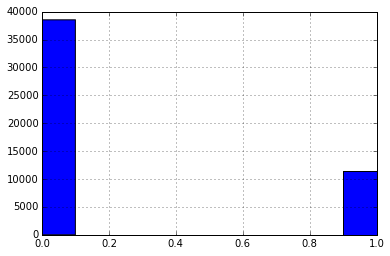

In [32]:
target.hist()

In [57]:
from sklearn.metrics import f1_score
print 'f1 score:', f1_score(y_test, pred)

f1 score: 0.346889952153


In [58]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, pred) 

0.52623275816294579

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[9045,  428],
       [2302,  725]])

### 4. Draw ROC Curve

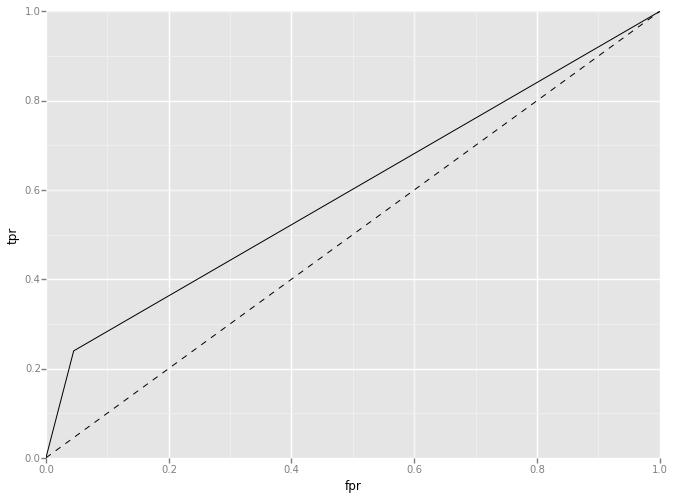

<ggplot: (395353561)>

In [60]:
from ggplot import *
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, pred)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

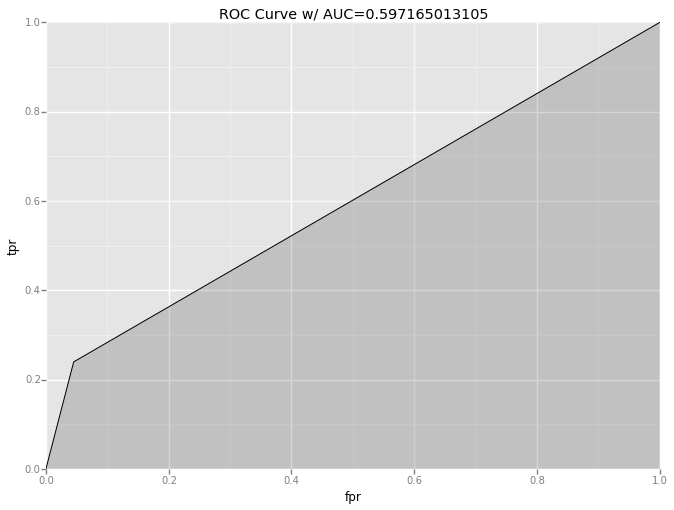

<ggplot: (347422673)>

In [61]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

### 5. Try Decision Tree

In [25]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(min_samples_split=40)
clf_tree.fit(X_train_pca, y_train)
pred = clf_tree.predict(X_test_pca)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print 'Accuracy of the Decision Tree Model:', accuracy_score(y_test, pred)
print 'f1 score:', f1_score(y_test, pred)

Accuracy of the Decision Tree Model: 0.66424
f1 score: 0.312079986887


### 6. Try Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
pred = gnb.predict(X_test_pca)

print 'Accuracy of the Naive Bayes Model:', accuracy_score(y_test, pred)
print 'f1 score:', f1_score(y_test, pred)

Accuracy of the Naive Bayes Model: 0.64944
f1 score: 0.372026368587


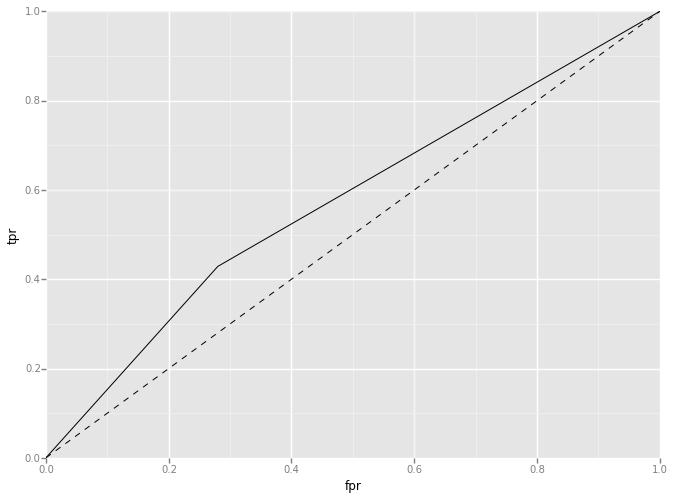

<ggplot: (371620025)>

In [31]:
from ggplot import *
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, pred)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

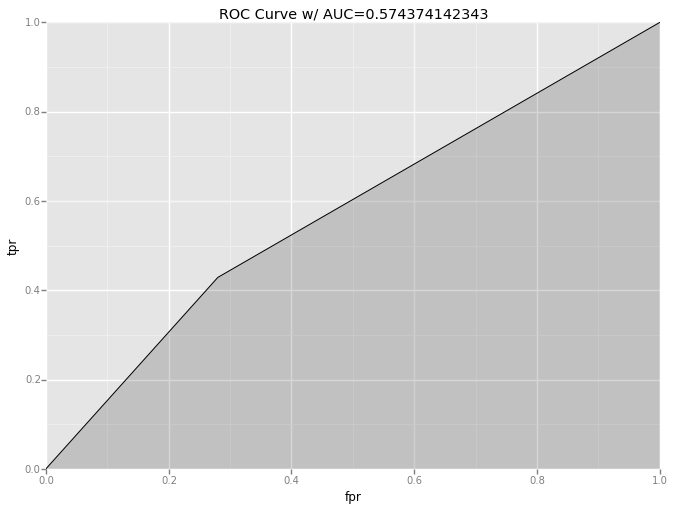

<ggplot: (401744857)>

In [32]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

### 7. Try kNN Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train_pca, y_train)
pred = neigh.predict(X_test_pca)

In [34]:
print 'Accuracy of the kNN Model:', accuracy_score(y_test, pred)
print 'f1 score:', f1_score(y_test, pred)

Accuracy of the Naive Bayes Model: 0.7552
f1 score: 0.0989399293286


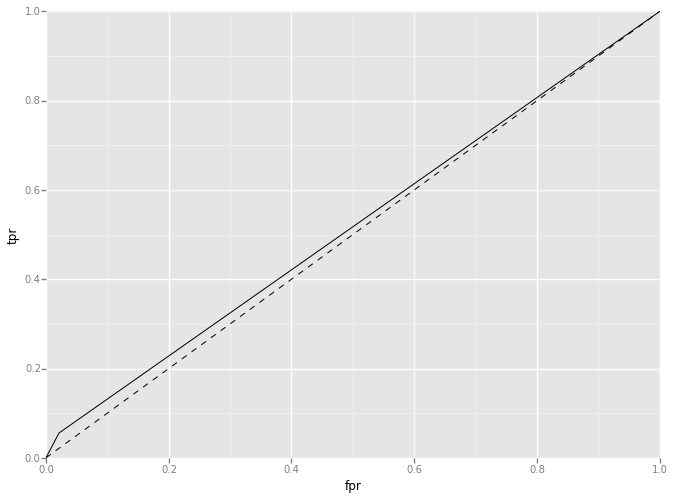

<ggplot: (315438993)>

In [35]:
from ggplot import *
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, pred)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

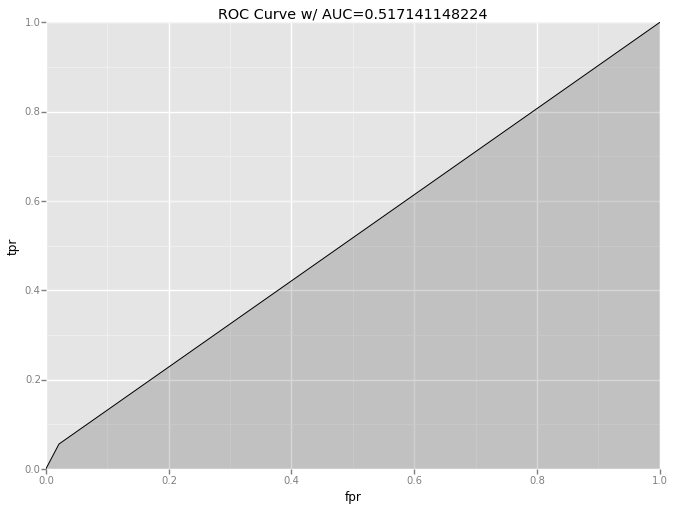

<ggplot: (315438869)>

In [36]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

### 8. Try AdaBoostClassifier

In [50]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(X_train_pca, y_train)
pred = adb.predict(X_test_pca)

In [51]:
print 'Accuracy of the AdaBoostClassifier:', accuracy_score(y_test, pred)
print 'f1 score:', f1_score(y_test, pred)

Accuracy of the AdaBoostClassifier: 0.76088
f1 score: 0.216102806189


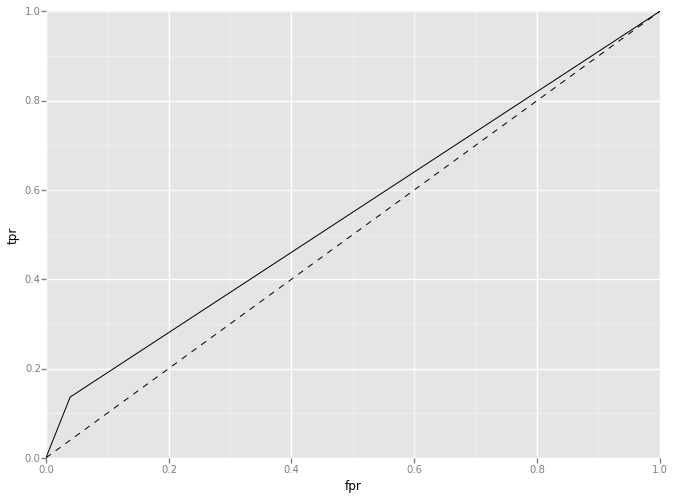

<ggplot: (401979489)>

In [52]:
from ggplot import *
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, pred)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

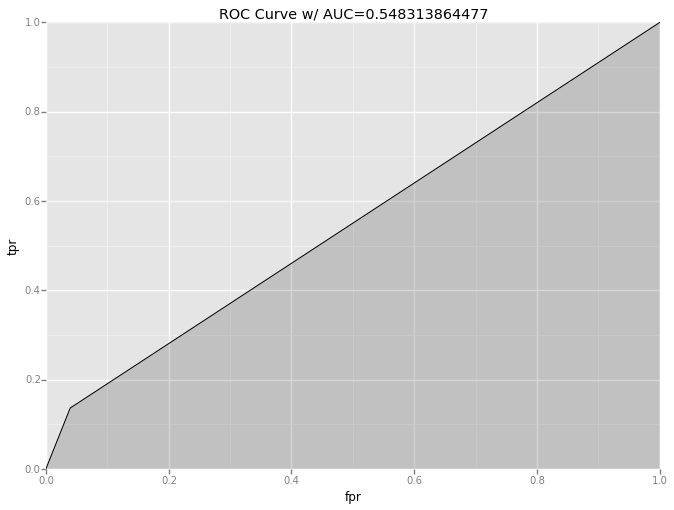

<ggplot: (379078297)>

In [53]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))